In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
best_d_val=0
best_score=0
for d_val in np.arange(0.5,1,0.1):
    d_val=round(d_val,1)
    AP= AffinityPropagation(damping=d_val)
    AP.fit(x)
    pred=AP.predict(x)
    cluster=len(np.unique(pred))
    score=silhouette_score(x,pred,sample_size=1000,random_state=42)
    print(f"Damping={d_val},cluster size={cluster},Score={score}")
    if score>best_score:
        best_score=score
        best_d_val=d_val
        
print(f"Best Damping value={best_d_val},Score={score}")
    

Damping=0.5,cluster size=11,Score=0.4317941560811469
Damping=0.6,cluster size=11,Score=0.4317941560811469
Damping=0.7,cluster size=11,Score=0.4429293887005518
Damping=0.8,cluster size=11,Score=0.4429293887005518
Damping=0.9,cluster size=10,Score=0.4444241960201344
Best Damping value=0.9,Score=0.4444241960201344


In [6]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=pred
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,8
196,197,Female,45,126,28,9
197,198,Male,32,126,74,8
198,199,Male,32,137,18,9


In [7]:
supervised.to_csv("Affinity.csv",index=False)

C:\Users\edwin\anaconda3\envs\MonicaAI\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


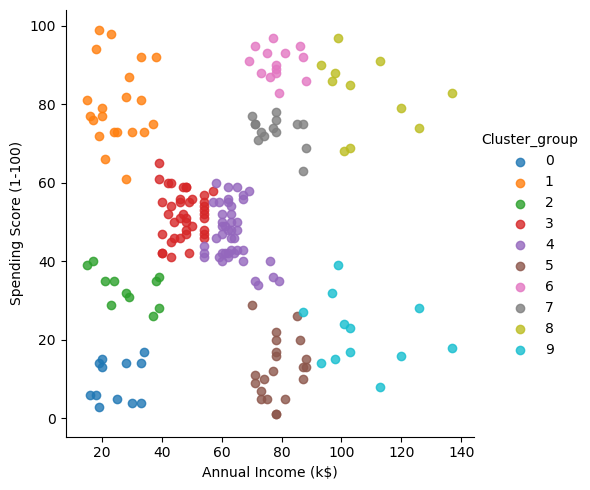

In [8]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend_out=True)

In [9]:
print(f"Best Damping value={best_d_val},Score={score}")

Best Damping value=0.9,Score=0.4444241960201344
